In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


In [97]:
data = pd.read_csv("scraped_questions.csv") 
data

,question,personal
0,What part of the brain regulates body temperat...,0
1,Do you like tea or coffee?,1
2,What was the last thing you recorded on TV?,1
3,What's your favorite movie?,1
4,What are the surnames of the father-son duos w...,0
...,...,...
1249,The American designer born in 1939 as Ralph Li...,0
1250,Which mammal has no vocal cords?,0
1251,What did the “Three Little Kittens” lose?,0
1252,What is the name of Mickey Mouse’s dog?,0


In [98]:
data.shape

(1254, 2)

In [99]:
data['question'] = data['question'].replace(r'\?', ' ', regex=True)
data

,question,personal
0,What part of the brain regulates body temperat...,0
1,Do you like tea or coffee,1
2,What was the last thing you recorded on TV,1
3,What's your favorite movie,1
4,What are the surnames of the father-son duos w...,0
...,...,...
1249,The American designer born in 1939 as Ralph Li...,0
1250,Which mammal has no vocal cords,0
1251,What did the “Three Little Kittens” lose,0
1252,What is the name of Mickey Mouse’s dog,0


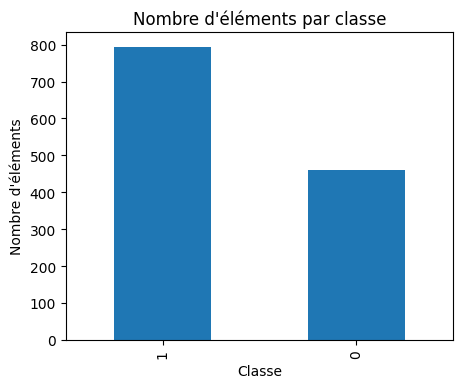

In [100]:
efectifs = data["personal"].value_counts()
plt.figure(figsize=(5, 4))
efectifs.plot(kind='bar')
plt.title('Nombre d\'éléments par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'éléments')

plt.show()


on remarque que les deux classe n'on pas le memme nombre donc on va ajouter de la data a la classe 0

In [43]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
from sklearn.utils import shuffle

In [5]:
url= 'https://www.geeksforgeeks.org/general-science-gk-questions/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
#soup

In [103]:
list_elements = soup.find_all('h3')
list_elements
questions_collection = []
for result_lists in list_elements:
    list_questions=result_lists.find_all('span')
     #list_questions
    for question in list_questions:
        text = question.get_text(strip=True)
        #print(text)
        questions_collection.append([text, 0])
df = pd.DataFrame(questions_collection, columns=['question', 'personal'])
df.drop_duplicates(inplace=True)
#df
df['question']= df['question'].str.replace(r'^(Question \d+\.|\d+\.)\s*', '', regex=True)
df

,question,personal
0,What is the chemical symbol for the element gold?,0
1,Which of the following is an example of a rene...,0
2,What is the process by which plants convert li...,0
3,"Which planet is known as the ""Red Planet""?",0
4,What is the pH value of pure water?,0
5,Which force keeps planets in orbit around the ...,0
6,What is the smallest unit of matter that retai...,0
7,What is the function of the human respiratory ...,0
8,Which process involves the conversion of a sol...,0
9,What is the main function of the nervous system?,0


In [104]:
url= 'https://infinitylearn.com/surge/gk-questions/gk-questions-and-answers-on-everyday-science/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
#soup

In [1]:
list_elements = soup.find_all('b')
#print(list_elements)
questions_collection=[]
for question in list_elements:
    text = question.get_text(strip=True)
    #print(text)
    questions_collection.append([text, 0])
df2 = pd.DataFrame(questions_collection, columns=['question', 'personal'])
df2.drop_duplicates(inplace=True)
#df2
df2['question']= df2['question'].str.replace(r'^Question:\s*', '', regex=True)
df2

NameError: name 'soup' is not defined

In [106]:
url= 'https://thesciencepool.com/100-science-quiz-questions-with-answers/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
#soup

In [107]:
list_elements = soup.find_all('p')
#print(list_elements)
questions_collection=[]
for question in list_elements:
    text = question.get_text(strip=True)
    #print(text)
    questions_collection.append([text, 0])
df3 = pd.DataFrame(questions_collection, columns=['question', 'personal'])
df3.drop_duplicates(inplace=True)
df3

,question,personal
0,Sciencepool,0
2,Science is a fascinating field that constantly...,0
3,"Throughout this blog, you’ll find questions de...",0
4,1. What is the chemical symbol for water?,0
5,Answer: H2O,0
...,...,...
200,99. What is the most abundant gas in the Earth...,0
202,100. What is the chemical symbol for potassium?,0
204,"Science can be a thrilling adventure, and thes...",0
205,For those looking to deepen their understandin...,0


data preprocessing:

In [108]:
df3 = df3[df3['question'].str.contains(r'\?')]
#df3
df3['question']= df3['question'].str.replace(r'^\d+\.\s*', '', regex=True)
df3

C:\Users\Windows\AppData\Local\Temp\ipykernel_15632\2250746724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['question']= df3['question'].str.replace(r'^\d+\.\s*', '', regex=True)


,question,personal
4,What is the chemical symbol for water?,0
6,What planet is known as the Red Planet?,0
8,What is the powerhouse of the cell?,0
10,Who is known as the father of modern physics?,0
12,What is the speed of light in a vacuum in mete...,0
...,...,...
194,What is the chemical symbol for neon?,0
196,What is the main component of the Earth’s oute...,0
198,What is the chemical symbol for sodium?,0
200,What is the most abundant gas in the Earth’s a...,0


In [109]:
df_complementaire= pd.concat([df, df2, df3], ignore_index=True)
df_complementaire

,question,personal
0,What is the chemical symbol for the element gold?,0
1,Which of the following is an example of a rene...,0
2,What is the process by which plants convert li...,0
3,"Which planet is known as the ""Red Planet""?",0
4,What is the pH value of pure water?,0
...,...,...
170,What is the chemical symbol for neon?,0
171,What is the main component of the Earth’s oute...,0
172,What is the chemical symbol for sodium?,0
173,What is the most abundant gas in the Earth’s a...,0


In [110]:
df_complementaire.info()
df_complementaire.drop_duplicates(inplace=True)
df_complementaire.dropna()
df_complementaire

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  175 non-null    object
 1   personal  175 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


,question,personal
0,What is the chemical symbol for the element gold?,0
1,Which of the following is an example of a rene...,0
2,What is the process by which plants convert li...,0
3,"Which planet is known as the ""Red Planet""?",0
4,What is the pH value of pure water?,0
...,...,...
168,What is the chemical symbol for manganese?,0
169,What is the largest land animal?,0
170,What is the chemical symbol for neon?,0
171,What is the main component of the Earth’s oute...,0


dataframe finale:

In [111]:
final_df= pd.concat([data, df_complementaire], ignore_index=True)

In [112]:
final_df = shuffle(final_df, random_state=42) 
final_df.drop_duplicates(inplace=True)
final_df.dropna()
final_df

,question,personal
51,"What is your favorite sensation Like, a touch...",1
289,Which email service is owned by Microsoft,0
677,Do you have any tips to increase your daily pr...,1
1005,What is the main ingredient in guacamole,0
367,Is there any common saying that doesn’t make s...,1
...,...,...
1095,What one professional accomplishment are you m...,1
1130,Which Avenger is the only one who could calm t...,0
1294,What is the process of a liquid changing into ...,0
860,If others could hear what you are thinking now...,1


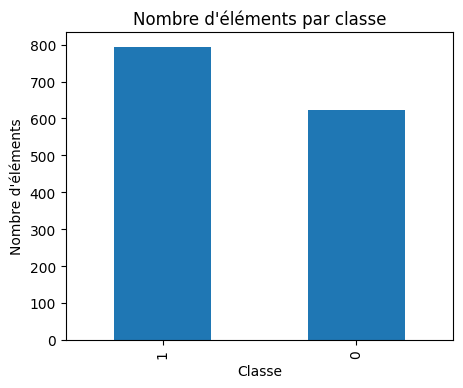

In [113]:
#plt.figure()
efectifs = final_df["personal"].value_counts()
plt.figure(figsize=(5, 4))
efectifs.plot(kind='bar')
plt.title('Nombre d\'éléments par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'éléments')

plt.show()

aprés qu'on a fini de balancer entre les differents classes on va maintenat enregistrer notre nouvelle dataset:

In [5]:
#final_df.to_csv('scraped_questionsfv.csv', index=False)

In [19]:
url= 'https://www.stylecraze.com/articles/questions-to-ask-to-get-to-know-someone/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
#print(soup)

In [21]:
list_elements = soup.find_all('ol')
#list_elements
#liste pour stockage des questions
questions_collection = []
for result_lists in list_elements:
    list_questions=result_lists.find_all('li')
     #list_questions
    for question in list_questions:
        text = question.get_text(strip=True)
        #print(text)
        questions_collection.append([text, 1])
df = pd.DataFrame(questions_collection, columns=['question', 'personal'])
df.drop_duplicates(inplace=True)
df

,question,personal
0,Are you a tea or coffee person?,1
1,What song best sums you up?,1
2,What do you do to keep yourself fit?,1
3,Which public transport do you use?,1
4,Do you like monsoons?,1
...,...,...
729,"If you can steal anything in this world, what ...",1
730,What TV advertisement that you saw recently ma...,1
731,Do you ever count how many steps you take out ...,1
732,Have you ever gotten a tattoo while you were d...,1


In [35]:
data= pd.read_csv("scraped_questionsfv.csv")
data

,Unnamed: 0,question,personal
0,372,Have you ever been to a date night that ended ...,1
1,355,Do you like children,1
2,55,If you had to embrace a completely new culture...,1
3,2462,What’s your favorite type of book to read,1
4,908,Do you want to confess something to someone,1
...,...,...,...
4276,1511,What is the largest known dinosaur,0
4277,1574,What is the largest mangrove forest in the world,0
4278,2159,What is the most famous art gallery in the Un...,0
4279,2406,What is the highest mountain in Africa,0


In [45]:
final_df= pd.concat([data, df], ignore_index=True)
final_df.drop_duplicates(inplace=True)
final_df.dropna()
final_df = shuffle(final_df)
final_df

,Unnamed: 0,question,personal
84,1802.0,What’s your favorite way to express creativity,1
2874,121.0,What is the smallest unit of matter that retai...,0
626,1648.0,What’s your favorite way to enjoy nature,1
91,2976.0,Do you like adventure,1
1921,2147.0,What’s your favorite hobby to do alone,1
...,...,...,...
3281,2373.0,What’s the best way to improve focus during work,1
2438,639.0,What is the main element in the sun,0
3591,2043.0,How do you develop emotional intelligence,1
2108,1790.0,What’s your favorite way to learn about history,1


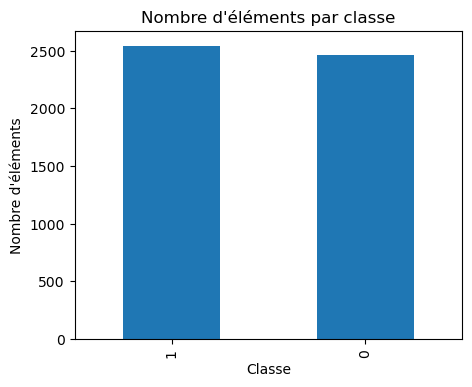

In [41]:
#plt.figure()
efectifs = final_df["personal"].value_counts()
plt.figure(figsize=(5, 4))
efectifs.plot(kind='bar')
plt.title('Nombre d\'éléments par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'éléments')

plt.show()

In [47]:
final_df.to_csv('scraped_questionsfv.csv', index=False)